# Unsupervised Learning_R5_Project2

# Classify a given silhouette as one of three different types of vehicle

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=10)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report


## Problem Statement :
## Build a model that will classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette.

## About the Data:

   __Classify a given silhouette of vehicles.__

The purpose of the case study is to classify a given silhouette as one of three different types of
vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from
one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was
chosen with the expectation that the bus, van and either one of the cars would be readily
distinguishable, but it would be more difficult to distinguish between the cars..

### Load Data and read the data as a data frame

In [2]:
vehicle_df = pd.read_csv("vehicle.csv")

### Shape of the data

In [3]:
vehicle_df.shape

(846, 19)

### Data type of each attribute

In [4]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
vehicle_df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [6]:
vehicle_df.tail(5)

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [7]:
vehicle_df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
140           90         37.0                  80.0         171.0   
753           91         36.0                  72.0         162.0   
385           94         49.0                  87.0         159.0   
578           92         46.0                  82.0         170.0   
92           104         52.0                 100.0         191.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
140                  58.0                        9          157.0   
753                  60.0                        8          150.0   
385                  64.0                       10          157.0   
578                  58.0                        8          165.0   
92                   59.0                        9          197.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
140           42.0                    20.0                        132   
753           44.0                    19.0                        133   
385           43.0                    20.0                        158   
578           40.0                    20.0                        149   
92            33.0                    23.0                        158   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
140            172.0              373.0                      115.0   
753            166.0              334.0                      121.0   
385            179.0              363.0                      203.0   
578            181.0              409.0                      164.0   
92             218.0              583.0                      234.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
140                         60.0             3.0              18.0   
753                         63.0             2.0              22.0   
385                         75.0             4.0               0.0   
578                         61.0             8.0              11.0   
92                          70.0            10.0              10.0   

     skewness_about.2  hollows_ratio class  
140             201.0            209   car  
753             196.0            205   car  
385             183.0            194   van  
578             200.0            208   car  
92              191.0            198   car

### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### Input variables

In [9]:
print(vehicle_df.drop('class', axis=1).dtypes)

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object


### Target variable

In [10]:
print("class : values are {}, dtype is {}".format(vehicle_df['class'].unique(),
                                                          vehicle_df['class'].dtype))

class : values are ['van' 'car' 'bus'], dtype is object


#### Description of The Target Variables
- __class__	        Silhouette of three types of vehicles 'van', 'car' and 'bus'

### Null Values

In [11]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### Replacing null values in the columns with mean of the column

In [12]:
for col in vehicle_df.drop('class', axis=1) :
    if(vehicle_df[col].isna().sum() != 0) :
        #print(col, vehicle_df[col].isna().sum())
        vehicle_df[col].fillna(round(vehicle_df[col].mean()), inplace = True)

In [13]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Negative values

In [14]:
(vehicle_df.drop('class', axis=1) < 0).sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [15]:
print("\nThere are no Negative values in the dataset\n")


There are no Negative values in the dataset



### Duplicated data

In [16]:
vehicle_df.duplicated().sum()

0

In [17]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



## Exploratory Data Analysis (EDA) before Dimensionality Reduction using PCA

### 5 point summary of numerical attributes

In [18]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.829787    6.133957   33.0   40.00   
distance_circularity         846.0   82.109929   15.740904   40.0   70.00   
radius_ratio                 846.0  168.888889   33.400981  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.679669    7.882134   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901891   33.195189  112.0  147.00   
elongatedness                846.0   40.933806    7.811560   26.0   33.00   
pr.axis_rectangularity       846.0   20.583924    2.588445   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.632388   31.355203  130.0  167.00   
scaled_variance.1            846.0  439.492908  176.457707  184.0  318.25   
scaled_radius_of_gyration    846.0  174.710402   32.546227  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.445626    7.468514   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.602837    8.930803    0.0    5.00   
skewness_about.2             846.0  188.919622    6.152167  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Observations:
- The mean and standard deviation are approximately equal in Age column.
- The mimimum, 25% and Median are all 0 in Mortgage column, which indicate most customers do not have mortgage of house.
- The minimum value is zero in CCAvg column and also all values lie betwee 0 and 10.

### Outliers analysis of numerical columns

### Visualizing Outliers in dataset using boxplot before replacing the outliers with mean


		Boxplot to check the presence of outliers in numeric columns before replacement with mean



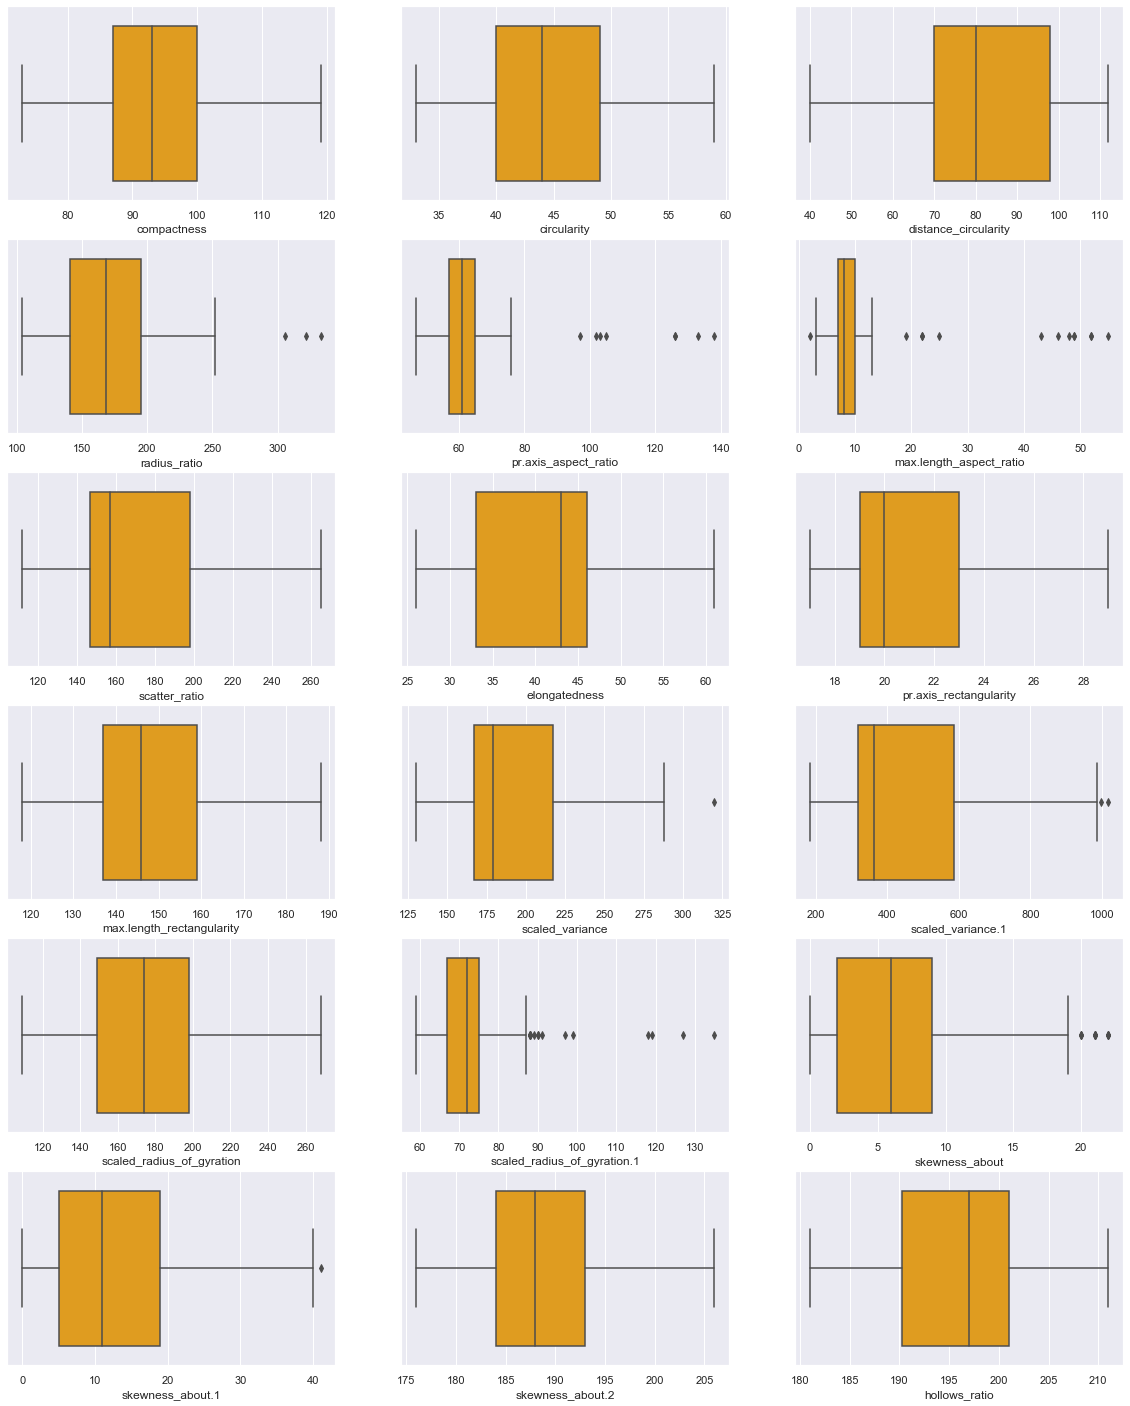

In [19]:
#Visualizing Outliers in dataset using boxplot before replacing the outliers with mean of columns

print('\n\t\tBoxplot to check the presence of outliers in numeric columns before replacement with mean')
print('\t\t===========================================================================================\n')
fig, ax = plt.subplots(6,3,figsize=(20, 25))
for col,subplot in zip(vehicle_df.drop('class', axis=1).columns,ax.flatten()) :
    sns.boxplot(x=vehicle_df[[col]], width=0.8, color='orange', ax=subplot)
    #subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
- Maximum number of Outliers (15) are present in scaled_radius_of_gyration.1 column
- pr.axis_aspect_ratio, max.length_aspect_ratio and skewness_about have 8, 13 and 12 outliers respectfully
- The remaining columns have 1,2 3 or no outliers
- Most of the columns are either right skewed or left skewed
- We can identifiy the outlier values using IQR and Quantiles method amd replace them with mean values 

### Identifying the Outliers using IQR and Quantiles and replacing them with mean

In [20]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = vehicle_df[col].quantile(0.25)
    q3 = vehicle_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [21]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.
#Replace the outliers with mean of the column

for col in vehicle_df.drop('class', axis=1).columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(vehicle_df.loc[(vehicle_df[col] < lower_limit) | (vehicle_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(vehicle_df.loc[(vehicle_df[col] < lower_limit) | (vehicle_df[col] > upper_limit)][col]))
        print("Replacing Outliers with mean of the column {}...".format(col))
        vehicle_df.loc[(vehicle_df[col] < lower_limit) | (vehicle_df[col] > upper_limit), col] = np.nan
        vehicle_df[col].fillna(round(vehicle_df[col].mean()), inplace=True)
        print('...Outliers are replaced with mean')
        #if(col == 'compactness' or col == 'max.length_rectangularity')
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : compactness
 Q1 = 87.0 
 Q3 = 100.0
 IQR = 13.0
 Lower limit = 67.5
 Upper limit = 119.5

OUTLIERS ARE NOT PRESENT in compactness column


Column name : circularity
 Q1 = 40.0 
 Q3 = 49.0
 IQR = 9.0
 Lower limit = 26.5
 Upper limit = 62.5

OUTLIERS ARE NOT PRESENT in circularity column


Column name : distance_circularity
 Q1 = 70.0 
 Q3 = 98.0
 IQR = 28.0
 Lower limit = 28.0
 Upper limit = 140.0

OUTLIERS ARE NOT PRESENT in distance_circularity column


Column name : radius_ratio
 Q1 = 141.0 
 Q3 = 195.0
 IQR = 54.0
 Lower limit = 60.0
 Upper limit = 276.0

3 OUTLIERS ARE PRESENT in radius_ratio column.
Outlier datapoints in radius_ratio column are:
[306. 322. 333.]
Replacing Outliers with mean of the column radius_ratio...
...Outliers are replaced with mean

Column name : pr.axis_aspect_ratio
 Q1 = 57.0 
 Q3 = 65.0
 IQR = 8.0
 Lower limit = 45.0
 Upper limit = 77.0

8 OUTLIERS ARE PRESENT in pr.axis_aspect_ratio column.
Outlier datapoints in pr.axis_aspect_ratio column

### Visualizing Outliers in dataset using boxplot after replacing the outliers with mean


		Boxplot to check the presence of outliers in numeric columns after replacement with mean



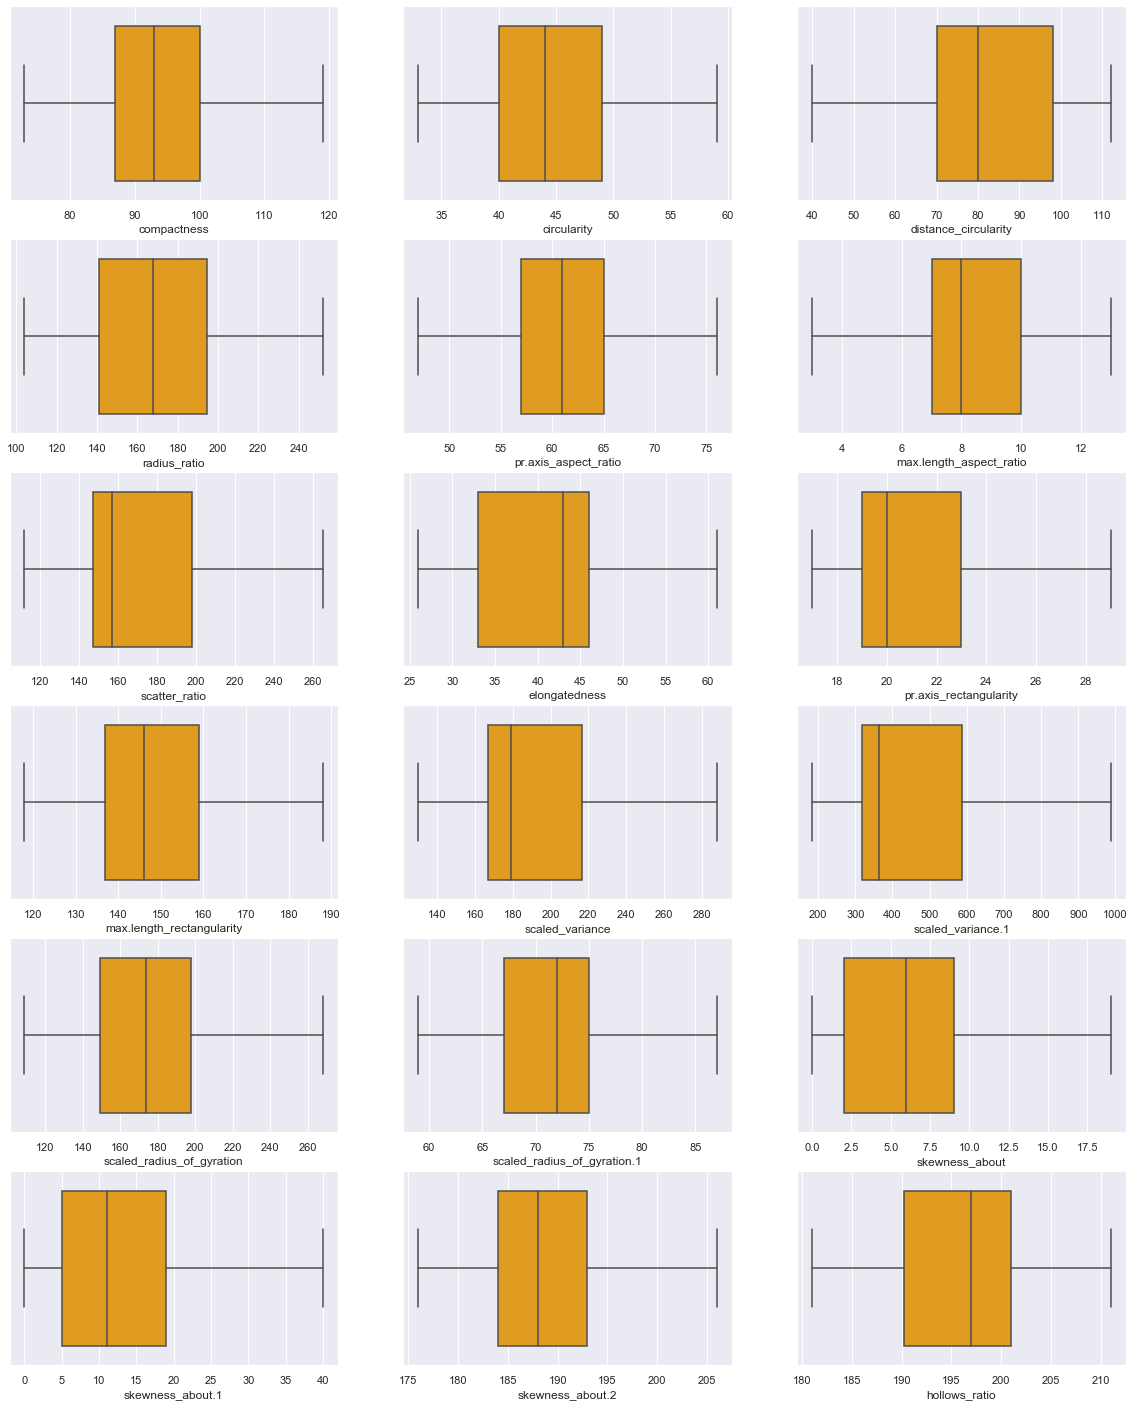

In [22]:
#Visualizing Outliers in dataset using boxplot after replacing the outliers with mean of the columns

print('\n\t\tBoxplot to check the presence of outliers in numeric columns after replacement with mean')
print('\t\t==========================================================================================\n')
fig, ax = plt.subplots(6,3,figsize=(20, 25))
for col,subplot in zip(vehicle_df.drop('class', axis=1).columns,ax.flatten()) :
    sns.boxplot(x=vehicle_df[[col]], width=0.8, color='orange', ax=subplot)
    #subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observation
- After replacing the outlier values in the dataset with mean of the feature columns, the Boxplots do not show any outliers in the datset.

## Variance in numerical columns

In [23]:
vehicle_df.var()

compactness                       67.806566
circularity                       37.625431
distance_circularity             247.776067
radius_ratio                    1033.472347
pr.axis_aspect_ratio              31.512534
max.length_aspect_ratio            4.260568
scatter_ratio                   1101.920541
elongatedness                     61.020465
pr.axis_rectangularity             6.700049
max.length_rectangularity        210.704141
scaled_variance                  962.701807
scaled_variance.1              30370.301914
scaled_radius_of_gyration       1059.256862
scaled_radius_of_gyration.1       37.926974
skewness_about                    20.911871
skewness_about.1                  78.804006
skewness_about.2                  37.849153
hollows_ratio                     55.335707
dtype: float64

## Visualizing variance of numerical columns through lineplot

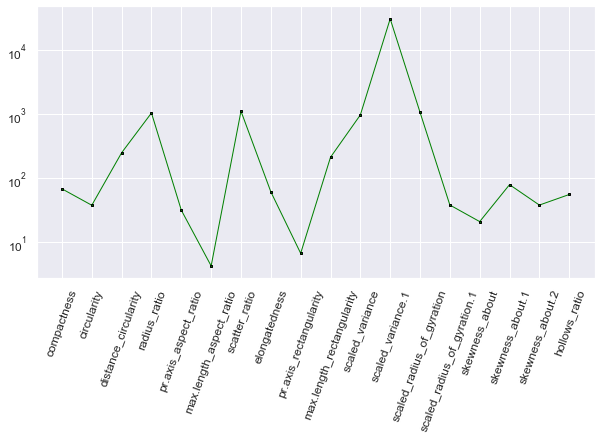

In [24]:
#plt.figure(figsize=(50,20))
plt.figure(figsize=(10,5))
#plt.xticks(rotation = 90, fontsize=40)
plt.xticks(rotation = 70, fontsize=12)
#plt.yticks(fontsize=40)
plt.yticks(fontsize=12)
#plt.plot(vehicle_df.var(), color='green', marker='s',linewidth=5, markersize=12)
plt.plot(vehicle_df.drop('class', axis=1).var(), color='green', marker='s',mec='black',linewidth=1, markersize=2)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
- The above line plot shows the variance values for all the numerical feature columns
- Variance in all the numerical columns vary exponentially
- Variance in max.length_aspect_ratio and pr.axis_rectangularity columns is very less with values 4.3 and 6.7
- Variance in scaled_variance.1 column is very high and in scale of 10^4
- Variance in columns radius_ratio, scatter_ratio, scaled_variance, scaled_radius_of_gyration.1 is in scale of 10^3
- Variance in distance_circularity and max.length_rectangularity in the order of 10^2 and remaining columns have variance between 10 and 100
- A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
- With the column variances varying exponentially, it is suggested to scale the column data using any standadization method for model building.

# Univariate Analysis

## Visualizing Distribution of numerical columns through distplots

In [25]:
#tb_df[num_columns].hist(bins=20, figsize=(15,9), layout=(2,2),color = 'red',alpha=0.6)
#plt.show()

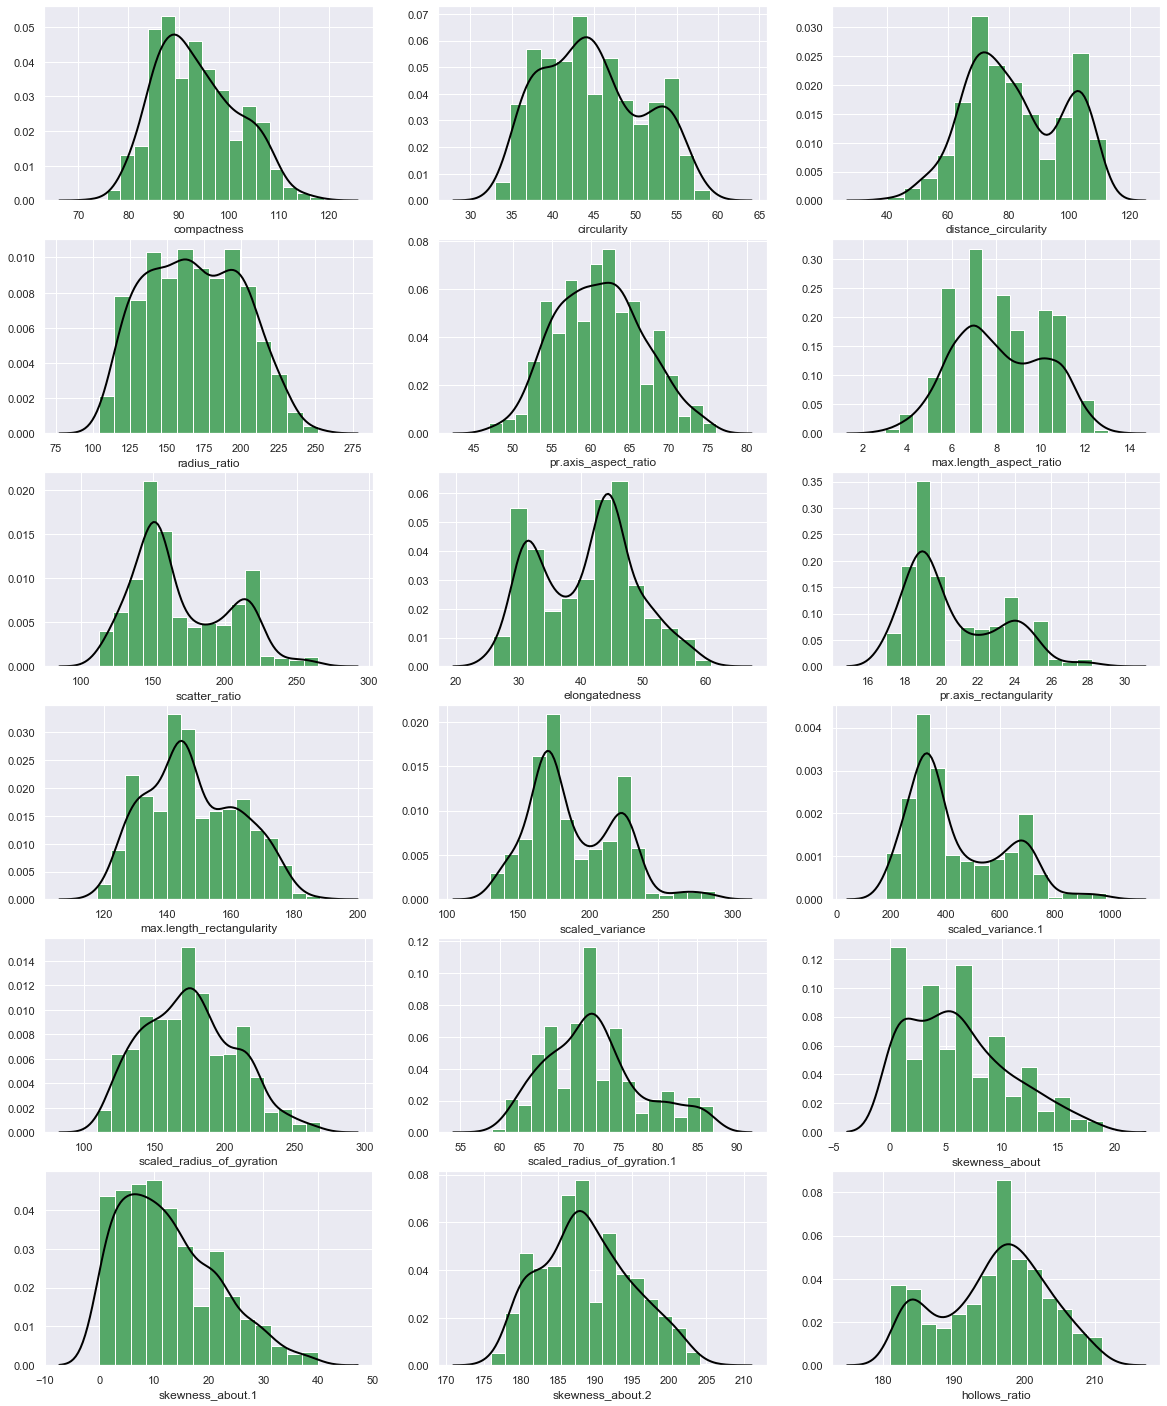

In [26]:
fig, ax = plt.subplots(6,3,figsize=(20, 25))
for col,subplot in zip(vehicle_df.drop('class', axis=1).columns,ax.flatten()) :
    ax =sns.distplot(vehicle_df[col], ax=subplot, hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})

### Observations on univariate analysis of numerical columns:
- Distplots for all the features show more than one Gaussian curve.So, there should be atleast two good clusters in the given dataset
- The 7 features compactness, distance_circularity, max.length_aspect_ratio, elongatedness, skewness_about, skewness_about.2,  hollows_ratio show that two clusters exist and clearly distinguish the two clusters 
- Th remainuing 10 features circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.1, show three clusters, but the third cluster is very small.
- With this evidence, we can say that two good clusters exist in the dataset.
- circularity is the only feature which shows only one gausian curve and is approximately normal.

### Target column distribution

In [27]:
# The Target column is 'class'.
# Value counts and distribution of Target column

In [28]:
vehicle_df.groupby(by='class').count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          218                   218           218   
car            429          429                   429           429   
van            199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     218                      218            218   
car                     429                      429            429   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     218                        218   
car              429                     429                        429   
van              199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        218   
car                429                429                        429   
van                199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            218             218               218   
car                            429             429               429   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 429            429  
van                 199            199

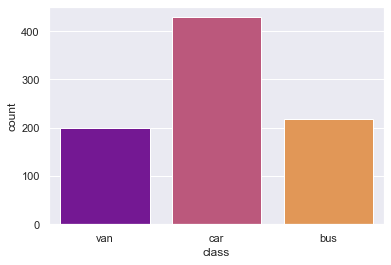

In [29]:
sns.countplot(vehicle_df['class'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
- The car class has the highest count of 429 which is 51% of the data
- The bus class has a count of 218 which is 26% of the data
- The remaining 23% is van class which has count of 199

# Bivariate Analysis

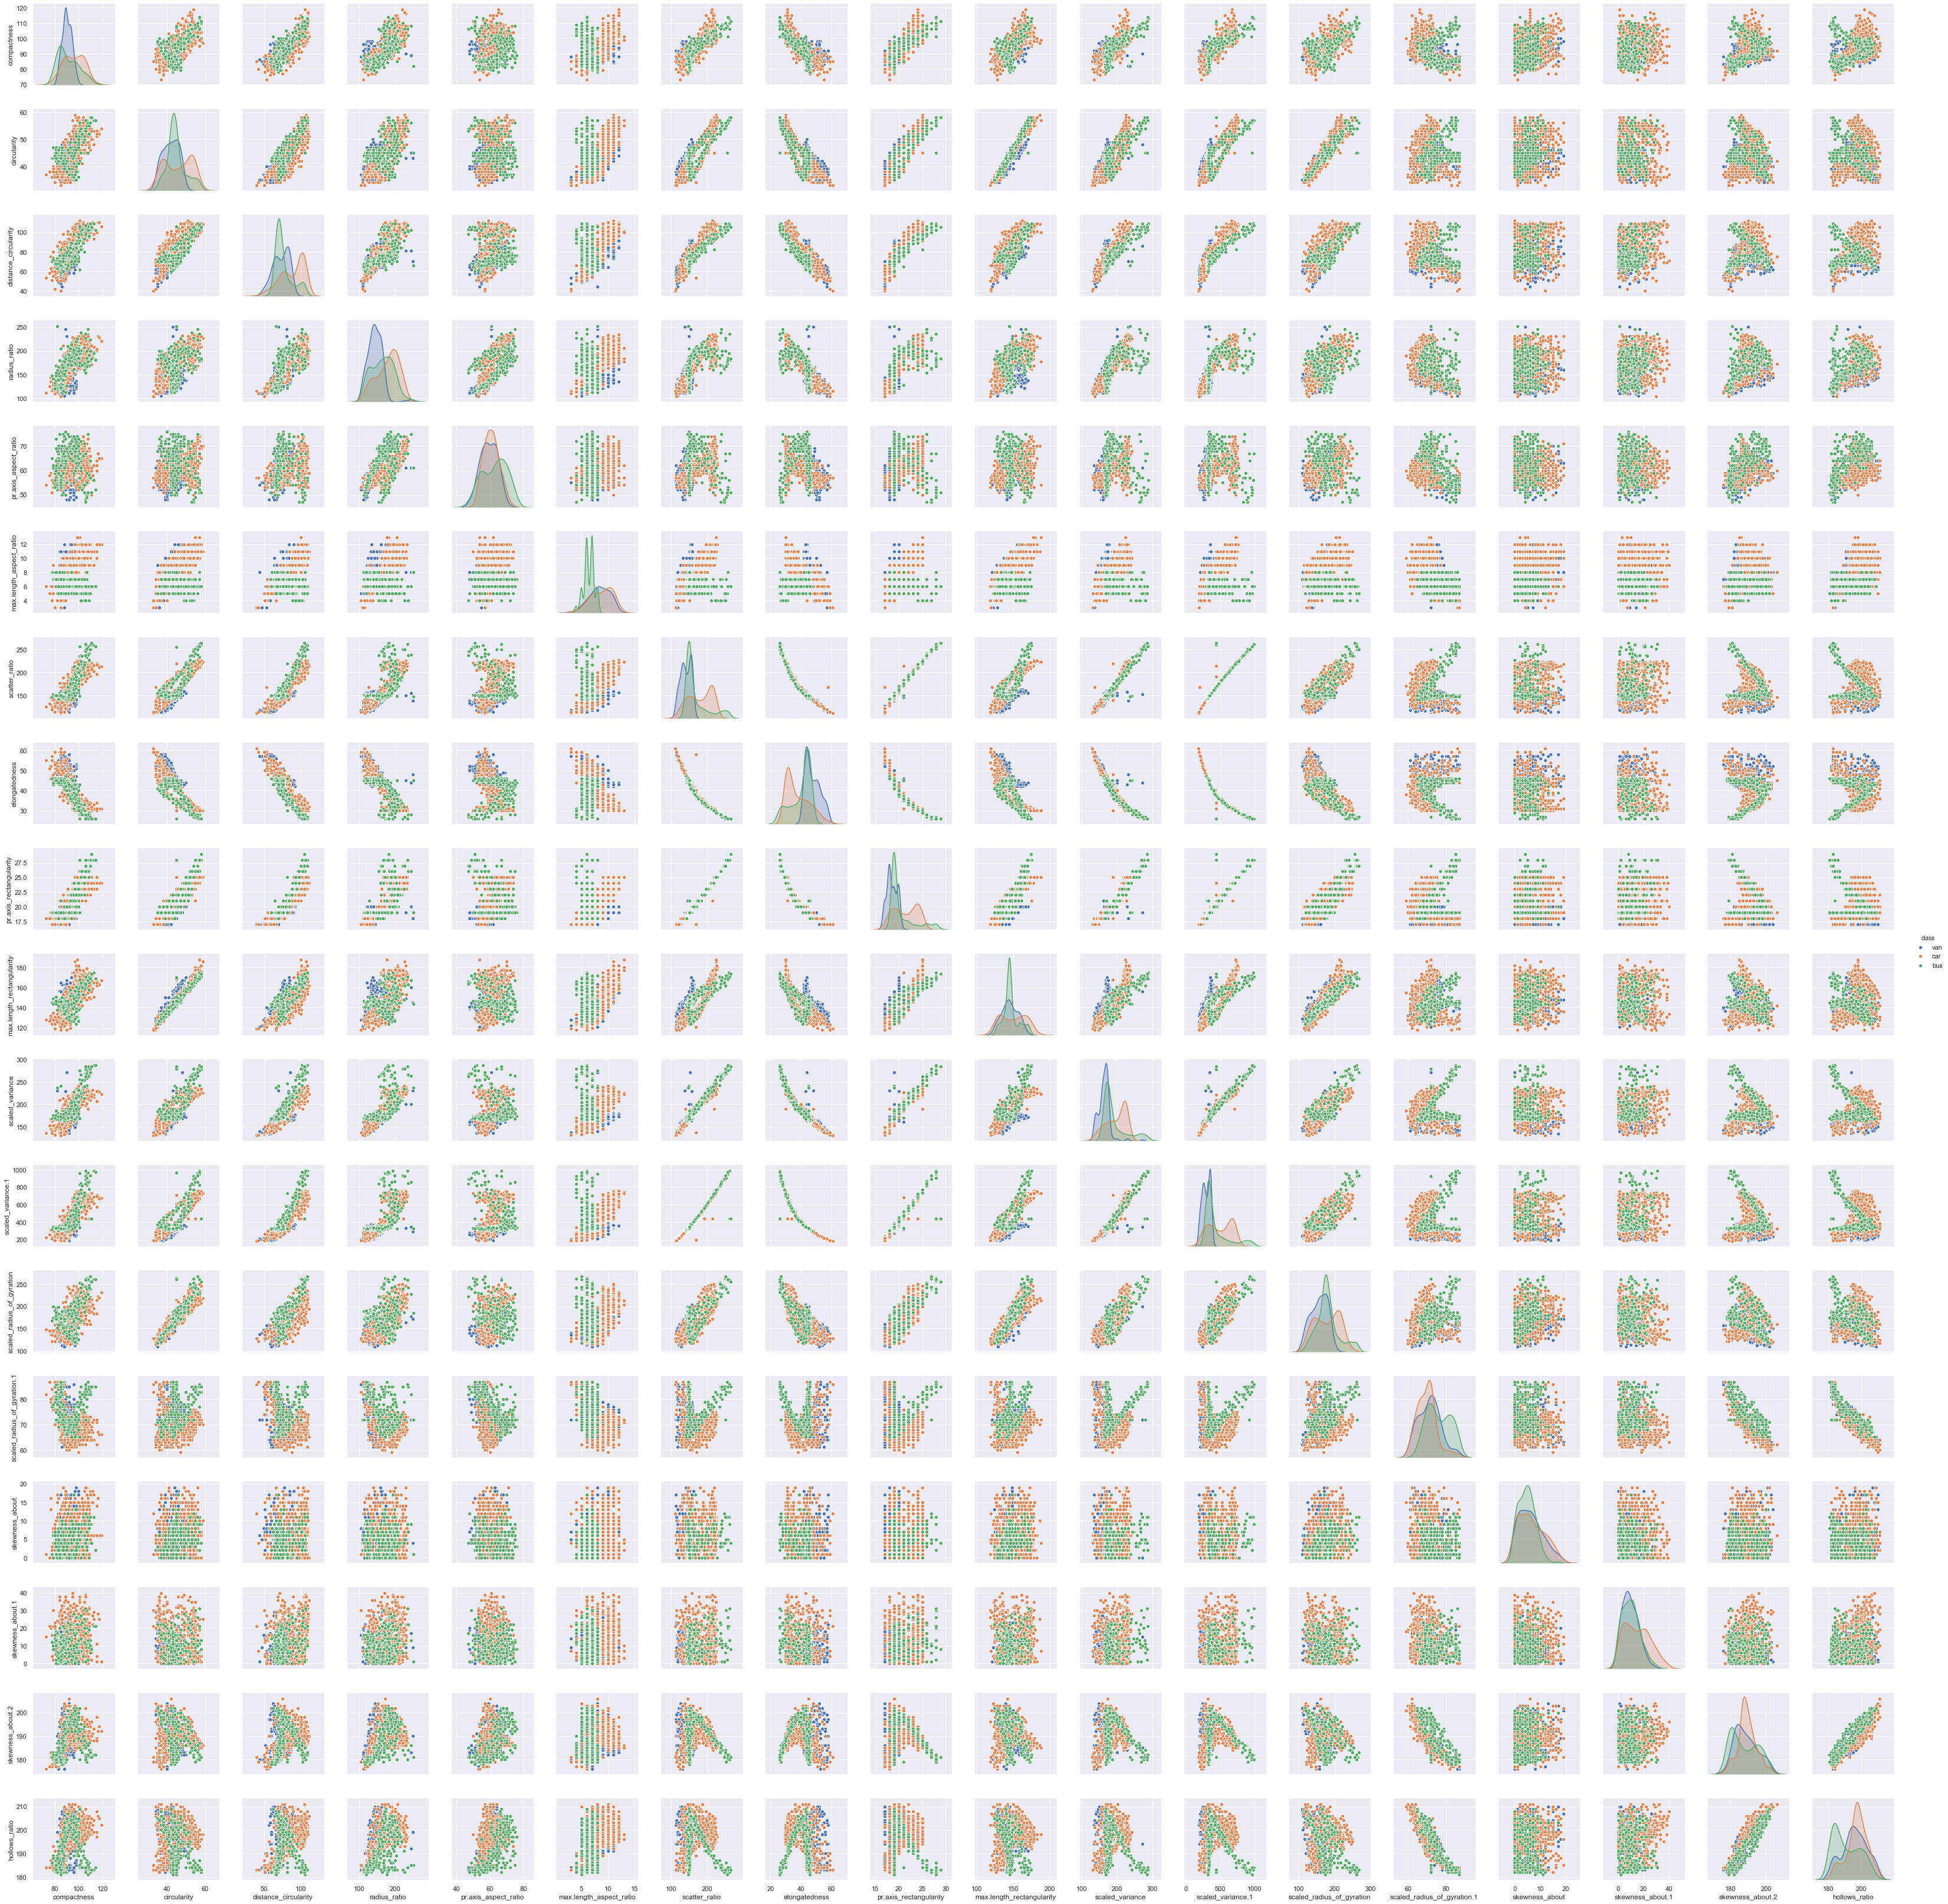

In [30]:
sns.pairplot(vars=list(vehicle_df.drop('class', axis=1).columns),hue='class',data=vehicle_df)
plt.show()

In [31]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Observations on bivariate analysis using pairplot:
- The ten features -  compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration have good linear relationship among them and are positively correlated
- These ten features should be considered for building a model
- The feature elongatedness has a negative correlation with above ten features and should be considered for building a model
- The seven features pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio are not correlated with any of other features as their scatter plots with the other features do give any inference
- These seven features need not be considered for building a model
- The two features scaled_radius_of_gyration, scaled_radius_of_gyration.1 are positively correlated among them but do not show linear relation with any of the other features
- The two features skewness_about.2, hollows_ratio are positively correlated among them but do not show linear relation with any of the other features
- The two features skewness_about, skewness_about.1 are not related among them and are also not related with any of the other features
- The KDE plots for all the features show overlapping gaussian curves, which shows that the three classes canno be classified easily.
- The KDE plots show multiple gaussian curves for each classs and significantly show that two good clusters exist in the dataset

- __From the pairplot analysis we can conclude that 11 features are of importance and have to be part of the analysis.These features are - compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration, elongatedness__
- __The remaining 7 features need not be considered for anaysis__ 

## Correlation between numerical columns

In [32]:
corr = vehicle_df.corr()
#corr.style.background_gradient(cmap='YlGnBu')
corr.style.background_gradient(cmap='cubehelix')

## Visualizing Correlation between numerical columns through Heat map

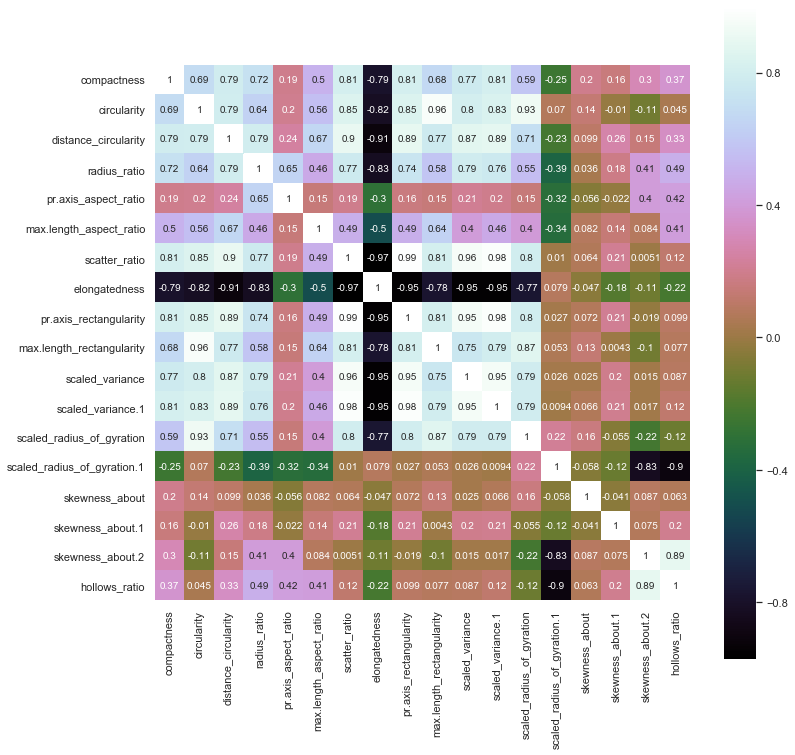

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.show()

### Observations on Correlation between numerical columns:
- The feature elongatedness shows negative correlation values and so has strong negative correlation with all other features except scaled_radius_of_gyration.1, skewness_about,skewness_about.1, skewness_about.2, hollows_ratio
- The features pr.axis_aspect_ratio, scaled_radius_of_gyration.1, skewness_about,skewness_about.1, skewness_about.2, hollows_ratio have very low correlation values
- pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 are the features having high correlation values with any other features except pr.axis_aspect_ratio, scaled_radius_of_gyration.1, skewness_about,skewness_about.1, skewness_about.2, hollows_ratio
- The features compactness, circularity, distance_circularity, radius_ratio also show good correlation values
- __From the correlation analysis we can conclude that 11 features are of importance and have to be part of the analysis.These features are - compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration, elongatedness__
- __The remaining 7 features need not be considered for anaysis__ 

# Dimensionality Reduction using Principal Component Analysis (PCA)

### Label Encoding class column with values 0,1,2 for van, car and bus

In [34]:
vehicle_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [35]:
#Use LabelEncoder to convert the class values to numeric

le = LabelEncoder()
le.fit(vehicle_df['class'])

LabelEncoder()

In [36]:
vehicle_df['class'] = le.transform(vehicle_df['class'])

In [37]:
le.classes_

array(['bus', 'car', 'van'], dtype=object)

In [38]:
vehicle_df['class'].unique()

array([2, 1, 0], dtype=int64)

### Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [39]:
X = vehicle_df.drop('class',axis=1)
y = vehicle_df['class']

In [40]:
print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (846, 18)
Shape of Target-set :  (846,)


### Split the data as train set and test set with a ratio of 70:30.

In [41]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [42]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (592, 18)  Target : (592,)

Test Set Shape:
Features : (254, 18)  Target : (254,)


### Standardize the training dataset and test dataset

In [43]:
#Standardization using Standard Scaler class of sklearn.preprocessing module
#Training set scaled using Standard Scaler

scaler = StandardScaler().fit(X_train)

In [44]:
#Training set transformed to fit Standard Scaler

X_trainS = scaler.transform(X_train)

In [45]:
#Test set transformed to fit Standard Scaler

X_testS = scaler.transform(X_test)

In [46]:
print(X_trainS.mean(), X_trainS.std())

1.516971400013352e-16 1.0


In [47]:
print(X_testS.mean(), X_testS.std())

-0.0018230776071211869 0.9601962849381643


### Apply PCA on the Full Feature Set

#### Creating PCA featureset with all Possible Principle Components by giving n_components = None

In [48]:
#Creating all Possible Principle Components by giving n_components = None
#Use fit() method to fit the Model on X_TrainS

pca = PCA()
pca.fit(X_trainS)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
#Use transform() method on X_trainS, to transform and and return the principle components createdn for X_trainS

XtrainS_pca = pca.transform(X_trainS)

In [50]:
#Use transform() method on X_TestS, to transform and and return the principle components created for Xtest_S.

XtestS_pca = pca.transform(X_testS)

In [51]:
XtrainS_pca[0:3], XtestS_pca[0:3]

(array([[-4.20568716e-01, -2.69044002e-01, -1.11885485e-01,
         -7.97861437e-01, -1.90130407e-01, -3.78280278e-01,
          4.47328661e-01,  5.23187845e-01,  9.66400587e-01,
          1.45024400e+00,  3.66094011e-01,  2.95207565e-01,
          8.89734299e-01, -2.99905925e-01, -4.15070892e-02,
          2.68302184e-02,  3.59523696e-01,  1.57519760e-02],
        [-3.98453667e+00,  1.69225822e+00, -5.44146530e-01,
          6.44775007e-01,  9.54898217e-01, -2.14099935e+00,
          7.32151768e-01, -3.15818373e-01, -1.92443959e-01,
         -1.58809420e-02, -3.38872157e-02, -3.89505139e-01,
         -5.77217033e-02,  1.22077340e-02,  3.34974676e-02,
          2.42689299e-02, -8.80961647e-02,  1.30354867e-02],
        [ 2.08779462e+00, -1.18622409e+00, -2.27616122e+00,
          1.30663744e-01, -3.79514972e-01, -5.59728277e-01,
          1.60932124e-01,  3.58018685e-01,  2.12715132e-01,
         -1.80245469e-01, -3.00803858e-03,  4.45179327e-01,
          1.67734222e-01, -1.04443618e

In [52]:
#Number of Principal components created out of the PCA model when fit on the train set

pca.n_components_

18

In [95]:
#The Principal components for all the features - no of Principal components X no of features

#pca.components_

In [54]:
#The variance explained by each of the Principal component

pca.explained_variance_

array([9.83483245e+00, 3.33960448e+00, 1.21312239e+00, 1.12165063e+00,
       8.45757063e-01, 6.35854113e-01, 3.13146997e-01, 2.27639700e-01,
       1.25373936e-01, 8.44884880e-02, 7.77672865e-02, 6.11251618e-02,
       4.04939320e-02, 3.20635775e-02, 2.98747406e-02, 2.12008291e-02,
       2.02342698e-02, 6.22681629e-03])

In [55]:
#The percentage of variance explained by each of the Principal component

pca.explained_variance_ratio_

array([5.45456642e-01, 1.85220181e-01, 6.72818440e-02, 6.22086637e-02,
       4.69071344e-02, 3.52655575e-02, 1.73676685e-02, 1.26252874e-02,
       6.95345310e-03, 4.68587616e-03, 4.31310682e-03, 3.39010610e-03,
       2.24586278e-03, 1.77830089e-03, 1.65690425e-03, 1.17583427e-03,
       1.12222724e-03, 3.45349890e-04])

In [56]:
#Sort the explained variance ratio in descending order to find which pc explains highest amount of variance and also
#to find the numer of pc's which explain 95% or more variance

explained_var_ratio = sorted(pca.explained_variance_ratio_, reverse=True)
explained_var_ratio

[0.5454566421836464,
 0.1852201807629749,
 0.06728184404449487,
 0.062208663680093756,
 0.04690713441692325,
 0.035265557526432706,
 0.01736766847644997,
 0.012625287393238614,
 0.006953453101623028,
 0.004685876162902037,
 0.004313106822434438,
 0.0033901060997580863,
 0.002245862784007564,
 0.0017783008924243358,
 0.0016569042523492986,
 0.0011758342708896865,
 0.001122227239304208,
 0.0003453498900529471]

In [57]:
#Find the principal components which explain more than 95% of variance and also find their count

total_variance = 0
pca_comp_list = []
for ele in explained_var_ratio:
    total_variance = total_variance + ele
    pca_comp_list.append(ele)
    if total_variance >=0.95 :
        print("explained varince =", total_variance)
        break
#print(total_variance)
print("Prinicipal Components list is \n",pca_comp_list)
#print(sum(pca_comp_list))

explained varince = 0.9597076910910158
Prinicipal Components list is 
 [0.5454566421836464, 0.1852201807629749, 0.06728184404449487, 0.062208663680093756, 0.04690713441692325, 0.035265557526432706, 0.01736766847644997]


In [58]:
print("Total number of principal components which cover more than 95% variance =", len(pca_comp_list))
print ("The total variance explained by the {} Features = {}".format( len(pca_comp_list),round(sum(pca_comp_list),2)))

Total number of principal components which cover more than 95% variance = 7
The total variance explained by the 7 Features = 0.96


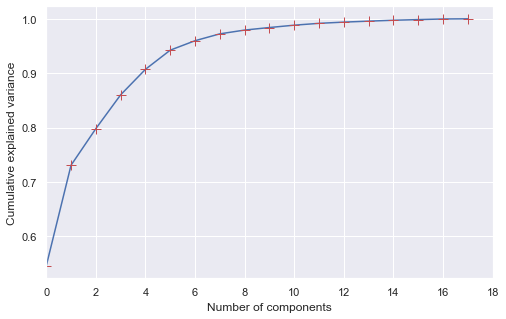

In [59]:
# Elbow Method to find Number of Principal components which explain more than 95% of variance in the Feature Set

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='+', mec='r', ms=10)
plt.xlim(0,pca.explained_variance_ratio_.shape[0],1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Observations from PCA:
- It can be seen that first principal component explains 52.45% variance, the second principal component explains 16.65% variance in the dataset.
- Collectively __96.24%__ of the variance in the Features in the original dataset is explained by __7 Principal components__
- So, instead of using all 18 Features of the original dataset for building the model, we can use only 7 of the Principal components obtained using PCA, which contain 96% of the information of all features in the original dataset, and explain 96% of the variance. 

#### Creating PCA featureset with 7 Principle Components which explain 96% variance by giving n_components = 7

In [60]:
#Creating all Possible Principle Components by giving n_components = None
#Use fit() method to fit the Model on X_TrainS

pca_7comp = PCA(n_components = 7)
pca_7comp.fit(X_trainS)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
#Use transform() method on X_trainS, to transform and and return the principle components createdn for X_trainS

XtrainS_pca = pca_7comp.transform(X_trainS)

In [62]:
#Use transform() method on X_testS, to transform and and return the principle components createdn for X_testS

XtestS_pca = pca_7comp.transform(X_testS)

In [63]:
XtrainS_pca[0:3], XtestS_pca[0:3]

(array([[-0.42056872, -0.269044  , -0.11188548, -0.79786144, -0.19013041,
         -0.37828028,  0.44732866],
        [-3.98453667,  1.69225822, -0.54414653,  0.64477501,  0.95489822,
         -2.14099935,  0.73215177],
        [ 2.08779462, -1.18622409, -2.27616122,  0.13066374, -0.37951497,
         -0.55972828,  0.16093213]]),
 array([[ 0.23121526,  1.00743198,  1.13452548, -1.26233366, -1.54407586,
         -0.44221992,  0.07647385],
        [-0.37268412, -1.67215952,  0.1787794 , -0.51835458, -1.25961739,
         -0.2567235 ,  0.19107439],
        [ 0.28218185,  0.49977018,  0.03249073, -0.19854018, -1.89266282,
         -1.34870112, -0.38876191]]))

In [64]:
#Number of Principal components created out of the new PCA model when fit on the train set

pca_7comp.n_components_

7

In [96]:
#The Principal components for all the features - no of Principal components X no of features

#pca_7comp.components_

In [66]:
#The variance explained by each of the Principal component

pca_7comp.explained_variance_

array([9.83483245, 3.33960448, 1.21312239, 1.12165063, 0.84575706,
       0.63585411, 0.313147  ])

In [67]:
#The percentage of variance explained by each of the Principal component

pca_7comp.explained_variance_ratio_

array([0.54545664, 0.18522018, 0.06728184, 0.06220866, 0.04690713,
       0.03526556, 0.01736767])

#### We will use the 7 Principal components obtained from the PCA model to build the model using SVM

# Implementing Support Vector Machine (SVM) Classification model

In [68]:
#DataFrame to store model Performance metrics of SVM done before performing PCA and after performing PCA
compare_metrics_df = pd.DataFrame(index=('SVM WITHOUT HyperParams', 'SVM WITH HyperParams'), 
                                  columns=('Trainingset Accuracy', 'Testset Accuracy', 'Precision Score', 
                                           'Recall Score', 'F1 Score'))

In [69]:
compare_metrics_df.index.name = 'Classifier Name'

## Implementing SVM algorithm on PCA Train and Test sets Without Hyperparameter Tuning

In [70]:
#Implementing SVM Classifier with default kernel as rbf

svm_clf = SVC(C=1.0, degree=3, gamma='scale', kernel='rbf', max_iter=-1, random_state=7)
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [71]:
#Fit the model to the training set with Principal Component Features

svm_clf.fit(XtrainS_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
# Predict classes using the built model

yhat_svm = svm_clf.predict(XtestS_pca)

In [73]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['SVM WITHOUT HyperParams','Trainingset Accuracy'] = round(svm_clf.score(XtrainS_pca, y_train), 2)
svm_clf.score(XtrainS_pca, y_train)

0.9425675675675675

In [74]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['SVM WITHOUT HyperParams','Testset Accuracy'] = round(svm_clf.score(XtestS_pca, y_test), 2)
svm_clf.score(XtestS_pca, y_test)

0.9251968503937008

#### Calculating Model Performance Metrics.

##### confusion matrix

In [75]:
confusion_matrix_svm = confusion_matrix(y_test, yhat_svm)
confusion_matrix(y_test, yhat_svm)

array([[ 64,   2,   0],
       [  3, 115,   9],
       [  1,   4,  56]], dtype=int64)

##### accuracy-score

In [76]:
accuracy_score(y_test, yhat_svm)

0.9251968503937008

##### Precision score

In [77]:
compare_metrics_df.loc['SVM WITHOUT HyperParams','Precision Score'] = round(precision_score(y_test, yhat_svm, average='weighted'), 2)
precision_score(y_test, yhat_svm, average='weighted')

0.926669183273672

###### Recall score

In [78]:
compare_metrics_df.loc['SVM WITHOUT HyperParams','Recall Score'] = round(recall_score(y_test, yhat_svm, average='weighted'), 2)
recall_score(y_test, yhat_svm, average='weighted')

0.9251968503937008

###### F1-Score

In [79]:
compare_metrics_df.loc['SVM WITHOUT HyperParams','F1 Score'] = round(f1_score(y_test, yhat_svm, average='weighted'), 2)
f1_score(y_test, yhat_svm, average='weighted')

0.9253907732525251

##### Classification report

In [80]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.95      0.91      0.93       127
           2       0.86      0.92      0.89        61

    accuracy                           0.93       254
   macro avg       0.92      0.93      0.92       254
weighted avg       0.93      0.93      0.93       254



## Implementing SVM algorithm on PCA Train and Test sets With Hyperparameter Tuning

#### GridSearchCV algorith is being used for tuning the hyper parameters and selecting the best hyper parameters
#### Cross Validation technique is implemented by passing the parameter cv=5 to GridSearchCV method and finding the best accuracy buy using 5 fold splits

In [81]:
# dist of Hyper Parameters which are passed to GridSearchCV method to find the best hyper parameters

hyper_params = {'C':[0.01,0.05,0.1,0.5,1.0,5.0,10.0], 'gamma':('auto', 'scale'), 'kernel':('linear','poly','rbf'),
               'random_state':[7]}

In [82]:
#create an instance of SM class and pass it as estimator to GridSearchCV along with dict of hyper parameters
#use 5 folds of the data using cv=5 to find the best accuracy along models built

svm_clf_reg = SVC()
grid_search_cv = GridSearchCV(estimator=svm_clf_reg, param_grid=hyper_params, cv=5, iid=False)

In [83]:
#Fit the GridSearchCV model to obtain the dfferent SVM models with different hyper parameters for 5 fold splits

grid_search_cv.fit(XtrainS_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf'),
                         'random_state': [7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
# Get the list of metrics output by GridSearchCV model

sorted(grid_search_cv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'param_random_state',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [85]:
# Get all the hyper parameters combinations output by model

grid_search_cv.cv_results_['params']

[{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 7},
 {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 7},
 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 7},
 {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 7},
 {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 7},
 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7},
 {'C': 0.05, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 7},
 {'C': 0.05, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 7},
 {'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 7},
 {'C': 0.05, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 7},
 {'C': 0.05, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 7},
 {'C': 0.05, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 7},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 7},
 {'C': 0.1, 'gamma': 'auto', 'kernel':

In [86]:
#Best Hyper parameters output by the model

grid_search_cv.best_params_

{'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}

In [87]:
#Best Estimator output by the model with the best hyper parameters

grid_search_cv.best_estimator_

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [88]:
#Accuracy score for each split

for i in ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']:
    print(grid_search_cv.cv_results_[i])

[0.81666667 0.66666667 0.50833333 0.81666667 0.55       0.50833333
 0.86666667 0.76666667 0.58333333 0.86666667 0.575      0.55833333
 0.875      0.80833333 0.73333333 0.875      0.61666667 0.80833333
 0.9        0.85       0.9        0.9        0.75       0.86666667
 0.9        0.85833333 0.925      0.9        0.76666667 0.89166667
 0.89166667 0.89166667 0.89166667 0.89166667 0.85       0.9
 0.88333333 0.9        0.875      0.88333333 0.85       0.9       ]
[0.775      0.55833333 0.50833333 0.775      0.525      0.50833333
 0.75833333 0.7        0.59166667 0.75833333 0.525      0.56666667
 0.74166667 0.73333333 0.75833333 0.74166667 0.53333333 0.81666667
 0.75       0.78333333 0.83333333 0.75       0.65833333 0.825
 0.76666667 0.79166667 0.84166667 0.76666667 0.71666667 0.83333333
 0.76666667 0.775      0.88333333 0.76666667 0.775      0.89166667
 0.76666667 0.79166667 0.875      0.76666667 0.8        0.89166667]
[0.81355932 0.61864407 0.50847458 0.81355932 0.51694915 0.50847458
 0.83

In [89]:
# Mean Accuracy Score of each split for all hyper Parameters

grid_search_cv.cv_results_['mean_test_score']

array([0.80583152, 0.62001086, 0.51015645, 0.80583152, 0.53548385,
       0.51015645, 0.82783935, 0.73993626, 0.57251992, 0.82783935,
       0.55413009, 0.56078154, 0.829577  , 0.79074678, 0.777299  ,
       0.829577  , 0.57435753, 0.82783935, 0.83454875, 0.8483384 ,
       0.89897726, 0.83454875, 0.70271549, 0.88890555, 0.83791105,
       0.86185571, 0.91246704, 0.83791105, 0.75859626, 0.90582863,
       0.83111618, 0.87364914, 0.90726713, 0.83111618, 0.8364443 ,
       0.92085687, 0.83457772, 0.87695422, 0.89715341, 0.83457772,
       0.85848037, 0.91061495])

In [90]:
# Std Accuracy Score of each split for all hyper Parameters

grid_search_cv.cv_results_['std_test_score']

array([0.02244052, 0.03749716, 0.00217581, 0.02244052, 0.01481928,
       0.00217581, 0.03687747, 0.02909249, 0.01431148, 0.03687747,
       0.02066815, 0.00762318, 0.04571753, 0.03192903, 0.02767104,
       0.04571753, 0.03033638, 0.01390256, 0.04815818, 0.0430522 ,
       0.03629969, 0.04815818, 0.03019894, 0.03767501, 0.043664  ,
       0.03867122, 0.03816739, 0.043664  , 0.02654372, 0.04138565,
       0.04140352, 0.05017037, 0.01667265, 0.04140352, 0.04443529,
       0.02211153, 0.03994376, 0.04302689, 0.01837983, 0.03994376,
       0.03984531, 0.01267943])

#### The Best Hyper Parameters are  {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}

In [104]:
#Implementing SVM Classifier using best hyper parameters obtained by using GridSearchCV and Cross validation

svc_best = SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [105]:
#Fit the model with best hyper parameters to the training set with Principal Component Features

svc_best.fit(XtrainS_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [106]:
# Predict classes using the built model

yhat_svm_best = svc_best.predict(XtestS_pca)

In [107]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['SVM WITH HyperParams','Trainingset Accuracy'] = round(svc_best.score(XtrainS_pca, y_train), 2)
svc_best.score(XtrainS_pca, y_train)

0.9611486486486487

In [109]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['SVM WITH HyperParams','Testset Accuracy'] = round(svc_best.score(XtestS_pca, y_test), 2)
svc_best.score(XtestS_pca, y_test)

0.9212598425196851

#### Calculating Model Performance Metrics.

##### confusion matrix

In [110]:
confusion_matrix_svm = confusion_matrix(y_test, yhat_svm_best)
confusion_matrix(y_test, yhat_svm_best)

array([[ 64,   1,   1],
       [  2, 115,  10],
       [  1,   5,  55]], dtype=int64)

##### accuracy-score

In [111]:
accuracy_score(y_test, yhat_svm_best)

0.9212598425196851

##### Precision score

In [112]:
compare_metrics_df.loc['SVM WITH HyperParams','Precision Score'] = round(precision_score(y_test, yhat_svm_best, average='weighted'), 2)
precision_score(y_test, yhat_svm_best, average='weighted')

0.923545625163698

###### Recall score

In [113]:
compare_metrics_df.loc['SVM WITH HyperParams','Recall Score'] = round(recall_score(y_test, yhat_svm_best, average='weighted'), 2)
recall_score(y_test, yhat_svm_best, average='weighted')

0.9212598425196851

###### F1-Score

In [114]:
compare_metrics_df.loc['SVM WITH HyperParams','F1 Score'] = round(f1_score(y_test, yhat_svm_best, average='weighted'), 2)
f1_score(y_test, yhat_svm_best, average='weighted')

0.9217940973475931

##### Classification report

In [115]:
print(classification_report(y_test, yhat_svm_best))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.95      0.91      0.93       127
           2       0.83      0.90      0.87        61

    accuracy                           0.92       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.92      0.92      0.92       254



### Comparision of Metrics obtained by implementing SVM Without Hyper Parameters and With Hyper Parameters

In [116]:
compare_metrics_df

Trainingset Accuracy Testset Accuracy Precision Score  \
Classifier Name                                                                 
SVM WITHOUT HyperParams                 0.94             0.93            0.93   
SVM WITH HyperParams                    0.96             0.92            0.92   

                        Recall Score F1 Score  
Classifier Name                                
SVM WITHOUT HyperParams         0.93     0.93  
SVM WITH HyperParams            0.92     0.92